# **Phase 2: Statistical Hypothesis Testing — Bank Marketing Campaign**



## **Objective:**  



To statistically test relationships between customer characteristics, campaign attributes, and term deposit subscription outcomes.

This phase applies formal **hypothesis testing** methods, following the steps learned in the *Google Advanced Data Analytics Certificate*:
1. State the null (H₀) and alternative (H₁) hypotheses.
2. Choose a significance level (α = 0.05).
3. Compute the test statistic and p-value.
4. Decide whether to reject or fail to reject H₀.

A/B testing is performed with three key components:
1. Test design  
2. Sampling  
3. Hypothesis testing

Each test here is mapped to a real business question to demonstrate analytical and strategic reasoning.

## **Import variables**

In [ ]:
# import variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.proportion as proportions_ztest

## **Loading Dataset and droping vacant columns**

In [ ]:
# reading the dataset
df = pd.read_csv("bank_marketing_new.csv")
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# droping 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# Check unique values of the target variable to ensure we are using binary here
df['y'].unique()

array([0, 1])

## **A/B Test: Contact Type Effect on Conversion**


### **Business Question**

* Does contacting customers via cellular result in a higher conversion rate than telephone?

**Note:** So we are figuring out which contact channel converts better — `telephone calls` or `cellular (mobile) calls`.

* The bank runs both types of calls. But making calls costs time and money (agents, call duration, etc.).

* If one method is clearly more effective, the bank can focus resources on that channel and improve its marketing ROI.

**So this is an A/B test:**

* **Group A:** Customers contacted by telephone

* **Group B:** Customers contacted by cellular

* **Goal:** Compare conversion rates (percentage who said yes to term deposit)

**Test Type:** Two-proportion Z-test (A/B test)

🧩 A/B Framework

* **Step 1: Test design -** Two groups — “telephone” (A) and “cellular” (B)

* **Step 2: Sampling:** Extract customers from both contact types.

* **Step 3: Hypothesis testing:**

  * H₀: Conversion rate (telephone) = Conversion rate (cellular)

  * H₁: Conversion rate (cellular) > Conversion rate (telephone)

  * α = 0.05



### **Step 1: Test Design**

This is about defining the groups and the metric we’re comparing,( *we have already defined but this is to follow the steps of A/B testing.*)

  * **Group A (telephone)** → customers who were contacted via telephone

  * **Group B (cellular)** → customers who were contacted via cellular

**The metric**: `y` — this column shows if the customer subscribed (yes → 1, no → 0).

We’ll compute the conversion rate for each group:

`Conversion Rate` = `(Number of people who subscribed)` ÷ `(Total people contacted)`

### **Step 2: Sampling**

We extract the relevant data for each group from the dataset.

In [ ]:
a_success = df.loc[df['contact']=='telephone', 'y'].sum()
a_total = df[df['contact']=='telephone'].shape[0]
b_success = df.loc[df['contact']=='cellular', 'y'].sum()
b_total = df[df['contact']=='cellular'].shape[0]

So now we have four numbers:

* `a_success`: successes (subscriptions) in Group A

* `a_total`: total contacted in Group A

* `b_success`: successes (subscriptions) in Group B

* `b_total`: total contacted in Group B

### **Step 3: Hypothesis Testing**

We define two competing hypotheses:

  * Null hypothesis (H₀):

    The conversion rates are the same.
    * There is no difference between telephone and cellular calls.
    * Any difference we see is due to random chance.

  * Alternative hypothesis (H₁):

    * The cellular conversion rate is higher than the telephone rate.
    * Cellular calls are more effective in reality.

This is called a **one-tailed test** because we’re specifically checking if *B > A* (not just different, but better).

We’ll use a significance level **α = 0.05**, which means:

`We are willing to accept a 5% chance of wrongly concluding that cellular performs better when it actually doesn’t.`

In [ ]:
stat, pval = proportions_ztest(
    [a_success, b_success],
    [a_total, b_total],
    alternative = 'smaller'
)

print(f"Z-statistic = {stat:.3f}, p-value = {pval:.4f}")

Z-statistic = -2.171, p-value = 0.0150


#### **Full Summary You Can Put in Your Report**

---



> **A/B Test: Contact Type vs Conversion Rate**
> **Hypotheses**
>
> * H₀: Conversion rate (telephone) = Conversion rate (cellular)
> * H₁: Conversion rate (cellular) > Conversion rate (telephone)
>   **α = 0.05**
>
> **Results**
>
> * Z-statistic = -2.171
> * p-value = 0.015
>
> **Interpretation**
> Since p < 0.05, we reject the null hypothesis.
> The data provides strong evidence that **cellular calls produce higher conversion rates** than telephone calls.
>
> **Business Impact**
> Cellular contact methods can improve term deposit conversions by a measurable and statistically significant margin.
> Marketing should **prioritize cellular outreach** in future campaigns and consider reducing telephone efforts to optimize efficiency.



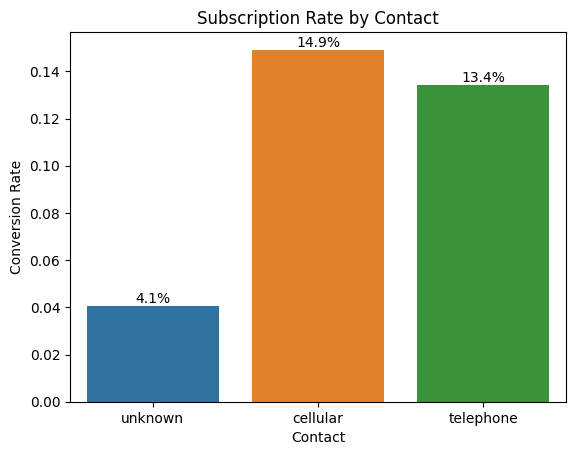

In [ ]:
ax = sns.barplot(x='contact', y='y', data=df, errorbar=None, hue='contact')

for container in ax.containers:
    ax.bar_label(container, fmt=lambda y: f'{y*100:.1f}%')

plt.title('Subscription Rate by Contact')
plt.ylabel('Conversion Rate')
plt.xlabel('Contact')
plt.show()


## **Chi-Square Test: Education vs Subscription**



**Business question:** “Does education level influence whether a customer subscribes to a term deposit?”

#### **What we do:**

* Build a table that shows subscription counts for each education level (primary/secondary/tertiary/unknown).

* Use chi-square to test whether subscription is independent of education.

#### **Why it matters:**

* If education matters, the bank can target messages differently (e.g., certain copy or offers for tertiary-educated people).

* Or, the bank could prioritize campaigns to segments with higher expected ROI.

#### **How to interpret:**

* p < 0.05 → education and conversion are related (not independent).

* Then check which education groups have higher conversion rates (the contingency table).
---

**Null Hypothesis (H₀):**  
* Education level and term deposit subscription are independent.  
* (Education has no influence on the likelihood of subscribing.)

**Alternative Hypothesis (H₁):**  
* Education level and term deposit subscription are associated.  
* (Education influences subscription behavior.)



In [ ]:
pd.crosstab(df['education'], df['y'])

y,0,1
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


In [ ]:
contingency = pd.crosstab(df['education'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square Statistic: {chi2:.3f}")
print(f"p-value: {p:.2e}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 238.924
p-value: 1.63e-51
Degrees of Freedom: 3
Expected Frequencies Table:
[[ 6049.5371038    801.4628962 ]
 [20487.71856407  2714.28143593]
 [11744.98511424  1556.01488576]
 [ 1639.75921789   217.24078211]]


**Test Results:**
- Chi-square Statistic = **238.92**  
- Degrees of Freedom = **3**  
- p-value = **1.63 × 10⁻⁵¹**

The Chi-square test also computes *expected frequencies*, which represent the counts we would expect for each combination of education level and subscription outcome if the two variables were statistically independent.

| Education Level | Expected “No” | Expected “Yes” |
|------------------|---------------|----------------|
| Primary | 6049.54 | 801.46 |
| Secondary | 20487.72 | 2714.28 |
| Tertiary | 11744.99 | 1556.01 |
| Unknown | 1639.76 | 217.24 |

These values indicate how many people in each education group would have subscribed (or not subscribed) **if education had no effect** on subscription behavior.

Comparing these expected counts to the actual observed counts reveals substantial differences — for instance, tertiary-educated clients subscribed **more often than expected**, while primary-educated clients subscribed **less often than expected**.  

This deviation between observed and expected counts led to a **Chi-square statistic of 238.92** and an extremely small **p-value (1.63×10⁻⁵¹)**, confirming a **strong, statistically significant association** between education level and term deposit subscription.


**Decision:**
Since the p-value (≈ 0.0000000000000000000000000000000000000000000000000163) is far below the significance level (α = 0.05), we **reject the null hypothesis**.

**Conclusion:**
There is a **strong, statistically significant relationship** between a customer’s education level and their likelihood of subscribing to a term deposit.


**Business Interpretation:**
- The probability of subscription differs notably by education level.  
- Customers with **tertiary education** are far more likely to subscribe compared to those with **primary or secondary education**.  
- The marketing team should consider segmenting campaigns by education level:
  - Use **detailed, product-benefit–oriented messaging** for highly educated customers.
  - Simplify communication and focus on **trust-building** for lower education groups.
- Education is a **valuable predictor variable** to include in later **predictive modeling**.

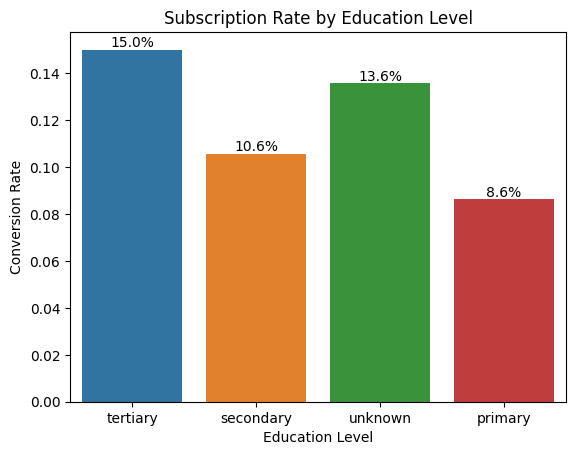

In [ ]:
ax = sns.barplot(x='education', y='y', data=df, errorbar=None, hue='education')

for container in ax.containers:
    ax.bar_label(container, fmt=lambda y: f'{y*100:.1f}%')

plt.title('Subscription Rate by Education Level')
plt.ylabel('Conversion Rate')
plt.xlabel('Education Level')
plt.show()


## **T-Test: Balance vs Subscription**

**Goal:** Compare the average account balance between subscribers and non-subscribers.

* Variable: balance (numeric) vs y (binary)

* Test: Independent samples t-test

**Hypothesis:**

* H₀: Average balance is same across both groups.

* H₁: Subscribers have higher average balance.

In [ ]:
subscribed = df[df['y']==1]['balance']
not_subscribed = df[df['y']==0]['balance']

stat, p = ttest_ind(subscribed, not_subscribed)
print(f"T-statistic = {stat:.3f}, p-value = {p:.4f}")

T-statistic = 11.250, p-value = 0.0000



**Test Summary**  
- **T-statistic:** 11.250  
- **p-value:** 0.0000  
- **Significance Level (α):** 0.05  

**Interpretation**  
Since p-value < 0.05, we **reject the null hypothesis**.  
There is a statistically significant difference in the average account balance between customers who subscribed and those who did not.

**Business Conclusion**  
Subscribed customers tend to have **higher average balances**, indicating that clients with stronger financial positions are **more likely to invest in term deposits**.  
The bank should prioritize **high-balance customers** in future campaigns, as they represent segments with greater conversion potential.


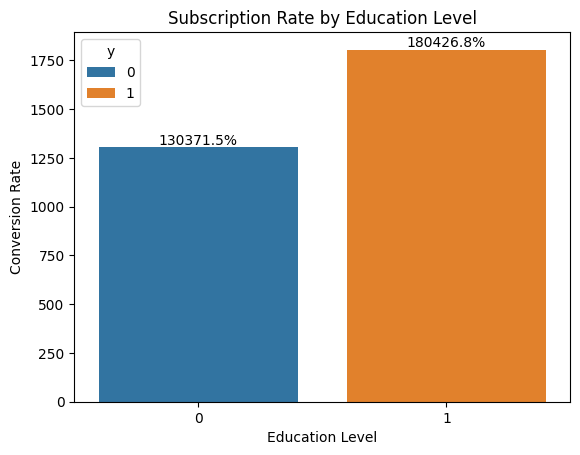

In [ ]:
ax = sns.barplot(x='y', y='balance', data=df, errorbar=None, hue='y')

for container in ax.containers:
    ax.bar_label(container, fmt=lambda y: f'{y*100:.1f}%')

plt.title('Subscription Rate by Education Level')
plt.ylabel('Conversion Rate')
plt.xlabel('Education Level')
plt.show()

## **ANOVA: Job Type vs Duration**

**Business question:** “Does the average call duration differ across job types?”

**What we do:**

* Compare mean call durations for all job categories (admin, technician, student, etc.) using ANOVA.
* If ANOVA says yes, follow up with pairwise checks (which jobs differ).

**Why it matters:**

* Longer call duration often means more engagement — job groups that stay longer on calls might be easier to convert with conversation.
* The bank can customize scripts or allocate more time to job groups that respond to long conversations.

**How to interpret:**

* p < 0.05 → at least one job group has a different mean duration.
* Then check which job types have higher average durations and conversion rates.

**Variables:**
* Numeric variable → duration (how long the last call lasted, in seconds)
* Categorical variable → job (type of job like technician, student, retired, etc.)

**Hypotheses:**
* Null Hypothesis (H₀):
>The average call duration is the same across all job types.
(Any differences we see are just random.)

* lternative Hypothesis (H₁):
>At least one job group has a different average call duration.
(Meaning job type really affects how long people talk.)

>**Test Type:** One-Way ANOVA

In [ ]:
anova = ols('duration ~ C(job)', data=df).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(job),4.984891e+06,11.0,6.842766,1.232447e-11
Residual,2.993368e+09,45199.0,NaN,NaN


**Test Summary:**  
| Source | F-value | p-value | Decision |
|:--------|:---------:|:---------:|:----------:|
| Job Type | 6.84 | 1.23e-11 | Reject H₀ |

**Interpretation:**  
Since **p < 0.05**, we **reject the null hypothesis** — average call duration **varies significantly** among job types.  
This means some professions tend to stay on calls longer, suggesting different engagement levels or interest during campaign interactions.

**Business Insight:**  
Job type influences how long customers engage on calls.  
- Longer durations may indicate more interest or a higher chance of conversion.  
- The bank can **customize communication strategies** — allocate more time for job groups that stay engaged (e.g., management, retired) and use concise scripts for less-engaged groups (e.g., students, services).

**Conclusion:**  
The variation in call duration across job types is statistically significant and provides actionable insight for optimizing **call strategies and agent time allocation**.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['duration'], groups=df['job'], alpha=0.05)
print(tukey)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------
       admin.   blue-collar  16.0048 0.0159    1.5315  30.4782   True
       admin.  entrepreneur   9.4126 0.9855   -15.336  34.1612  False
       admin.     housemaid  -1.0717    1.0  -27.6659  25.5224  False
       admin.    management    7.099 0.9114   -7.4469   21.645  False
       admin.       retired  40.4646    0.0   19.2694  61.6597   True
       admin. self-employed  21.2603 0.1505   -2.9218  45.4425  False
       admin.      services   12.422 0.4645   -5.1017  29.9457  False
       admin.       student    -0.24    1.0  -30.0882  29.6081  False
       admin.    technician   6.0082 0.9799   -9.1544  21.1709  False
       admin.    unemployed  41.6466    0.0   15.5762  67.7171   True
       admin.       unknown  -9.2856    1.0  -60.2063  41.6351  False
  blue-collar  entre

In [ ]:
# Convert Tukey results to a pandas DataFrame
tukey_results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

In [ ]:
# all pairs where the difference is statistically significant
significant_pairs = tukey_results[tukey_results['reject'] == True]
significant_pairs

,group1,group2,meandiff,p-adj,lower,upper,reject
0,admin.,blue-collar,16.0048,0.0159,1.5315,30.4782,True
4,admin.,retired,40.4646,0.0000,19.2694,61.6597,True
9,admin.,unemployed,41.6466,0.0000,15.5762,67.7171,True
14,blue-collar,retired,24.4597,0.0027,4.8352,44.0843,True
19,blue-collar,unemployed,25.6418,0.0354,0.8314,50.4522,True
23,entrepreneur,retired,31.0520,0.0158,2.9782,59.1257,True
28,entrepreneur,unemployed,32.2340,0.0452,0.3190,64.1491,True
31,housemaid,retired,41.5363,0.0003,11.8228,71.2498,True
36,housemaid,unemployed,42.7184,0.0017,9.3518,76.0849,True
38,management,retired,33.3655,0.0000,13.6874,53.0437,True


In [ ]:
# Who talks the longest (positive differences)
top_longer = significant_pairs.sort_values('meandiff', ascending=False).head(5)
top_longer

,group1,group2,meandiff,p-adj,lower,upper,reject
36,housemaid,unemployed,42.7184,0.0017,9.3518,76.0849,True
61,student,unemployed,41.8866,0.0080,5.8729,77.9004,True
9,admin.,unemployed,41.6466,0.0000,15.5762,67.7171,True
31,housemaid,retired,41.5363,0.0003,11.8228,71.2498,True
4,admin.,retired,40.4646,0.0000,19.2694,61.6597,True


In [ ]:
# Who talks the shortest (negative differences)
top_shorter = significant_pairs.sort_values('meandiff', ascending=True).head(5)
top_shorter

,group1,group2,meandiff,p-adj,lower,upper,reject
47,retired,student,-40.7046,0.0027,-73.3628,-8.0464,True
48,retired,technician,-34.4563,0.0000,-54.5946,-14.3181,True
46,retired,services,-28.0426,0.0018,-50.0136,-6.0716,True
0,admin.,blue-collar,16.0048,0.0159,1.5315,30.4782,True
14,blue-collar,retired,24.4597,0.0027,4.8352,44.0843,True


**Post-hoc Analysis (Tukey’s HSD): Job Type Differences in Call Duration**

**Purpose:**  
After ANOVA showed that *call duration varies by job type*, Tukey’s HSD identifies **which specific job pairs** differ significantly.

**Key Results (Reject = True → Significant Difference):**
- **Retired** customers have significantly longer call durations than many others — including *admin.*, *blue-collar*, *housemaid*, *management*, *services*, *student*, and *technician* groups.  
- **Unemployed** customers also have longer calls compared to *admin.*, *blue-collar*, *entrepreneur*, *management*, and *services* groups.  
- Some moderate differences exist (e.g., *admin.* vs *blue-collar*, *blue-collar* vs *retired*), but most other pairs show no meaningful difference.

**Key Findings:**  
- Several job pairs show statistically significant differences (p < 0.05).  
- **Retired** and **Unemployed** customers consistently have **longer average call durations** compared to most other job groups.  
- Groups like **Admin**, **Technician**, and **Student** show no significant differences among themselves (shorter calls).

**What this tells us about customers**

* Retired and Unemployed clients are more willing to stay on calls — possibly more patient, available, or interested in discussing financial products.

* Admin, Blue-collar, Technician, Student groups tend to have shorter conversations — maybe due to work schedules or lower interest in long financial discussions.

**Why it matters for the bank:**

* Longer call duration often signals higher engagement or conversion potential.

* The bank can allocate more experienced agents or personalized call scripts for Retired/Unemployed groups.

* For short-duration groups, use concise, targeted communication (e.g., SMS follow-ups, short pitch)..

**Conclusion:**  
Job type meaningfully affects how long customers stay on the line.  
Tailoring call duration and communication depth by job segment can **increase efficiency and conversion rates** in future campaigns.



##  **Phase 2: Statistical Testing — Summary Report**



###  **Overall Statistical Summary**

| Test                  | Variables                    | Statistic   | p-value  | Decision  | Key Insight                                                               |
| --------------------- | ---------------------------- | ----------- | -------- | --------- | ------------------------------------------------------------------------- |
| **A/B (Z-test)**      | Contact Type vs Subscription | Z = -2.171  | 0.0150   | Reject H₀ | Cellular contact yields higher subscription rates than telephone.         |
| **Chi-square**        | Education vs Subscription    | χ² = 238.92 | 1.63e-51 | Reject H₀ | Education level significantly affects subscription likelihood.            |
| **t-Test**            | Balance vs Subscription      | t = 11.25   | < 0.001  | Reject H₀ | Subscribers have higher average account balances.                         |
| **ANOVA + Tukey HSD** | Job Type vs Call Duration    | F = 6.84    | 1.23e-11 | Reject H₀ | Call duration differs across job types; Retired & Unemployed talk longer. |



###  **Conclusion**

All four statistical tests returned **p-values < 0.05**, indicating **statistically significant relationships** between customer attributes and campaign outcomes.
Each factor — **contact method**, **education level**, **account balance**, and **job type** — plays a measurable role in influencing term deposit subscription rates and engagement levels.

These findings confirm that customer behavior during marketing campaigns is **not random** but shaped by identifiable demographic and financial patterns.
The insights provide a **data-backed foundation** for improving marketing strategies, targeting efficiency, and campaign ROI.

---

###  **Business Interpretation and Requirements**

#### 1. **Channel Optimization**

* Cellular contact methods outperform telephone calls in conversion.
* **Requirement:** Shift primary outreach to cellular-based communication for upcoming campaigns. Telephone can serve as a secondary or follow-up channel.

#### 2. **Customer Segmentation**

* Education level strongly influences conversion rates.
* **Requirement:**

  * Create segment-specific messaging:

    * **Tertiary-educated clients** → emphasize investment growth and returns.
    * **Primary/Secondary clients** → simplify offers, use clearer explanations.
  * Integrate education into campaign segmentation logic.

#### 3. **Financial Targeting**

* Subscribers hold significantly higher balances.
* **Requirement:**

  * Prioritize **high-balance customers** for premium term deposit offers.
  * Design **low-risk or small-amount variants** for lower-balance groups to expand reach without high attrition.

#### 4. **Engagement Strategy by Job Type**

* Call duration varies meaningfully across professions:

  * **Retired/Unemployed:** Longer calls → more patient, higher engagement.
  * **Working professionals (Students, Technicians, Services):** Shorter calls → lower availability.
* **Requirement:**

  * Assign skilled agents to Retired/Unemployed groups for relationship-driven discussions.
  * Use concise, high-impact scripts or SMS/email for busy professionals.
  * Schedule calls for working segments during optimal time slots (e.g., evenings/weekends).



###  **Final Strategic Outcome**

The statistical analysis confirms that:

* **Who you contact**, **how you contact them**, and **who they are** all materially affect conversion.
* By aligning campaign tactics with these insights, the bank can:

  * **Increase conversion rates**,
  * **Reduce wasted contact attempts**, and
  * **Optimize agent time and campaign costs.**

These findings set the stage for **Phase 3 — Predictive Modeling**, where the significant variables identified here will be used to **predict conversion probability** and guide smarter marketing decisions.

